# 9. Testing the Time-series outputs from the data

In [18]:
from google.colab import drive

# Mounting Google Drive
drive.mount('/content/drive', force_remount=True) # Adding force_remount=True to force the remounting process

Mounted at /content/drive


In [19]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/train_data.csv')

In [20]:
df.drop(columns=["Unnamed: 0", "Unnamed: 0.1", "Unnamed: 0.2"], axis=1, inplace=True)

In [21]:
df

,reviews,date_reviews,rating,course_id,month,departments,name,institution,sentiment_from_rating,emotion_label,sentiment_label,sentiment_label_from_review
0,Andrew Ng has provided a fantastic resource fo...,2017-09-12,5,machine-learning,2017-09,Computer Science,Machine Learning,Stanford University,positive,admiration,5 stars,positive
1,Peer graded assingments take a lot of time bec...,2020-06-14,4,python-databases,2020-06,Computer Science,Using Databases with Python,University of Michigan,positive,neutral,4 stars,positive
2,This course was the first actual course for Pr...,2019-01-31,5,python,2019-01,Computer Science,Programming for Everybody (Getting Started wit...,University of Michigan,positive,admiration,5 stars,positive
3,The best course to start with if you are enter...,2017-08-20,5,machine-learning,2017-08,Computer Science,Machine Learning,Stanford University,positive,approval,5 stars,positive
4,I wanted to learn more about Functional Progra...,2020-07-12,4,programming-languages,2020-07,Computer Science,"Programming Languages, Part A",University of Washington,positive,approval,5 stars,positive
...,...,...,...,...,...,...,...,...,...,...,...,...
39733,This course is one of the best courses that sh...,2019-02-12,4,python-data-visualization,2019-02,Computer Science,"Capstone: Retrieving, Processing, and Visualiz...",University of Michigan,positive,admiration,5 stars,positive
39734,"The details about Objects, References and Alia...",2019-08-08,4,python-basics,2019-08,Computer Science,Python Basics,University of Michigan,positive,admiration,4 stars,positive
39735,This course gives very basic information about...,2016-02-19,4,python-databases,2016-02,Computer Science,Using Databases with Python,University of Michigan,positive,admiration,4 stars,positive
39736,Awesome courseDr. Chuck is great,2019-02-03,4,python,2019-02,Computer Science,Programming for Everybody (Getting Started wit...,University of Michigan,positive,admiration,5 stars,positive


In [10]:
df["course_id"].unique()

array(['machine-learning', 'python-databases', 'python',
       'programming-languages', 'data-scientists-tools',
       'uol-machine-learning-for-all', 'python-network-data',
       'python-data-analysis', 'python-basics', 'algorithmic-toolbox',
       'information-security-data', 'sql-for-data-science',
       'data-visualization-tableau',
       'computational-thinking-problem-solving',
       'programming-fundamentals', 'python-plotting',
       'big-data-introduction', 'python-machine-learning',
       'python-data-visualization', 'python-functions-files-dictionaries',
       'cs-fundamentals-1', 'python-statistics-financial-analysis',
       'data-analytics-for-lean-six-sigma',
       'python-programming-introduction', 'quantum-computing-algorithms',
       'object-oriented-design', 'introduction-to-computer-programming',
       'data-management', 'digital-business-models',
       'python-osnovy-programmirovaniya'], dtype=object)

Time-series analysis for the most common emotion in each month - for the python course

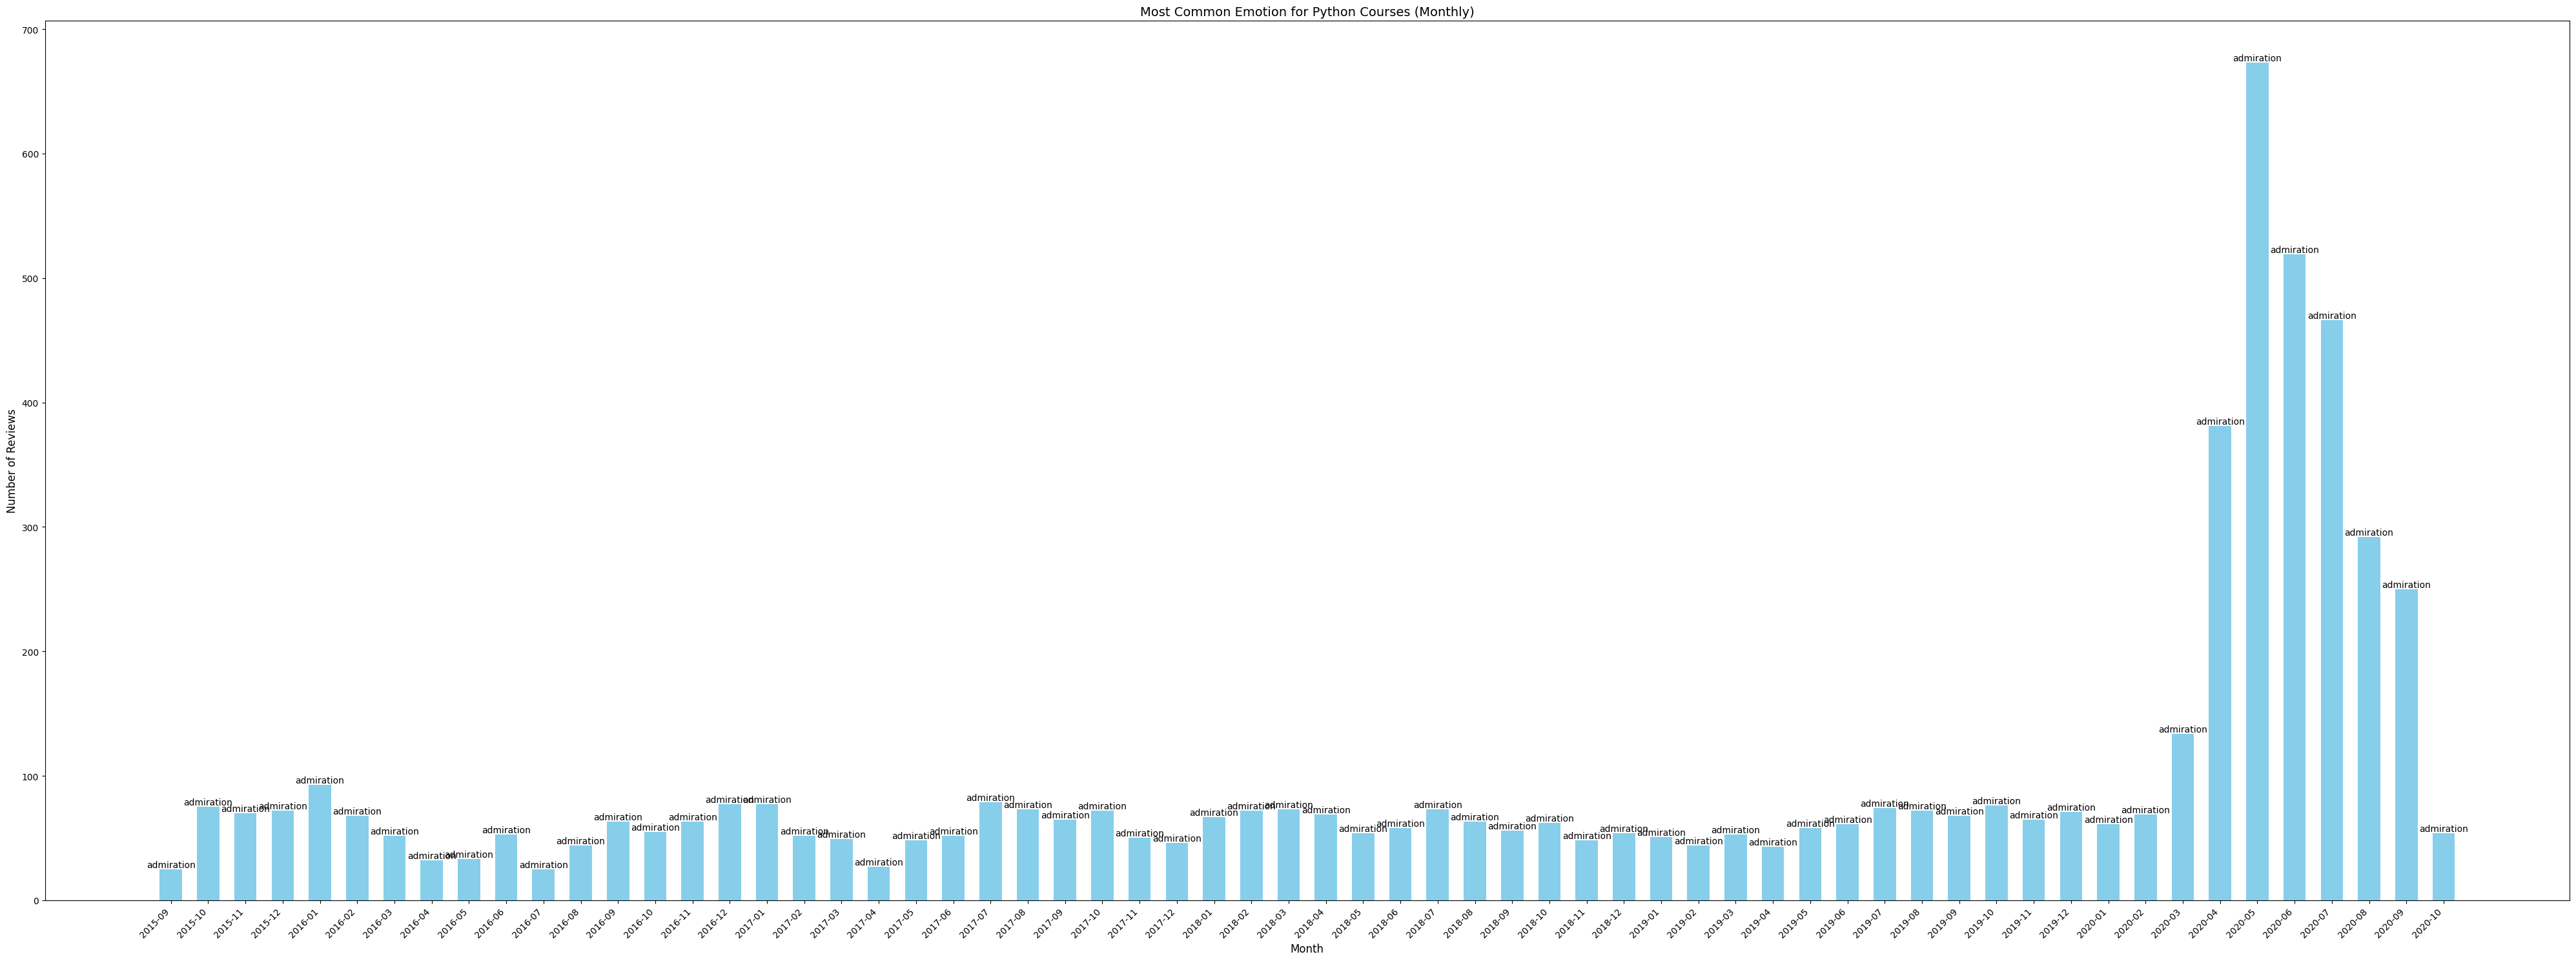

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

# Strip any leading/trailing spaces from column names
df.columns = df.columns.str.strip()

# Filter the DataFrame for reviews from the 'Python' courses (case insensitive)
python_reviews = df[df['course_id'] == 'python']

# Group by month and emotion, then count the occurrences of each emotion
monthly_emotion_counts = python_reviews.groupby(['month', 'emotion_label']).size().unstack(fill_value=0)

# Find the most common emotion for each month (the one with the highest count in each month)
most_common_emotion_per_month = monthly_emotion_counts.idxmax(axis=1)

# Find the count of the most common emotion for each month
most_common_emotion_count_per_month = monthly_emotion_counts.max(axis=1)

# Plotting the most common emotion for each month
plt.figure(figsize=(40, 15))

# Create a bar plot for the most common emotion per month
bars = plt.bar(most_common_emotion_per_month.index, most_common_emotion_count_per_month, color='skyblue', width=0.6)  # Adjust width for spacing

# Add titles and labels
plt.title('Most Common Emotion for Python Courses (Monthly)', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Reviews', fontsize=12)

# Rotate x-axis labels to prevent overlap
plt.xticks(rotation=45, ha='right', fontsize=10)

# Add labels to each bar indicating the emotion
for bar, emotion in zip(bars, most_common_emotion_per_month):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), emotion,
             ha='center', va='bottom', fontsize=10)

plt.tight_layout()  # Ensures everything fits without clipping
plt.show()


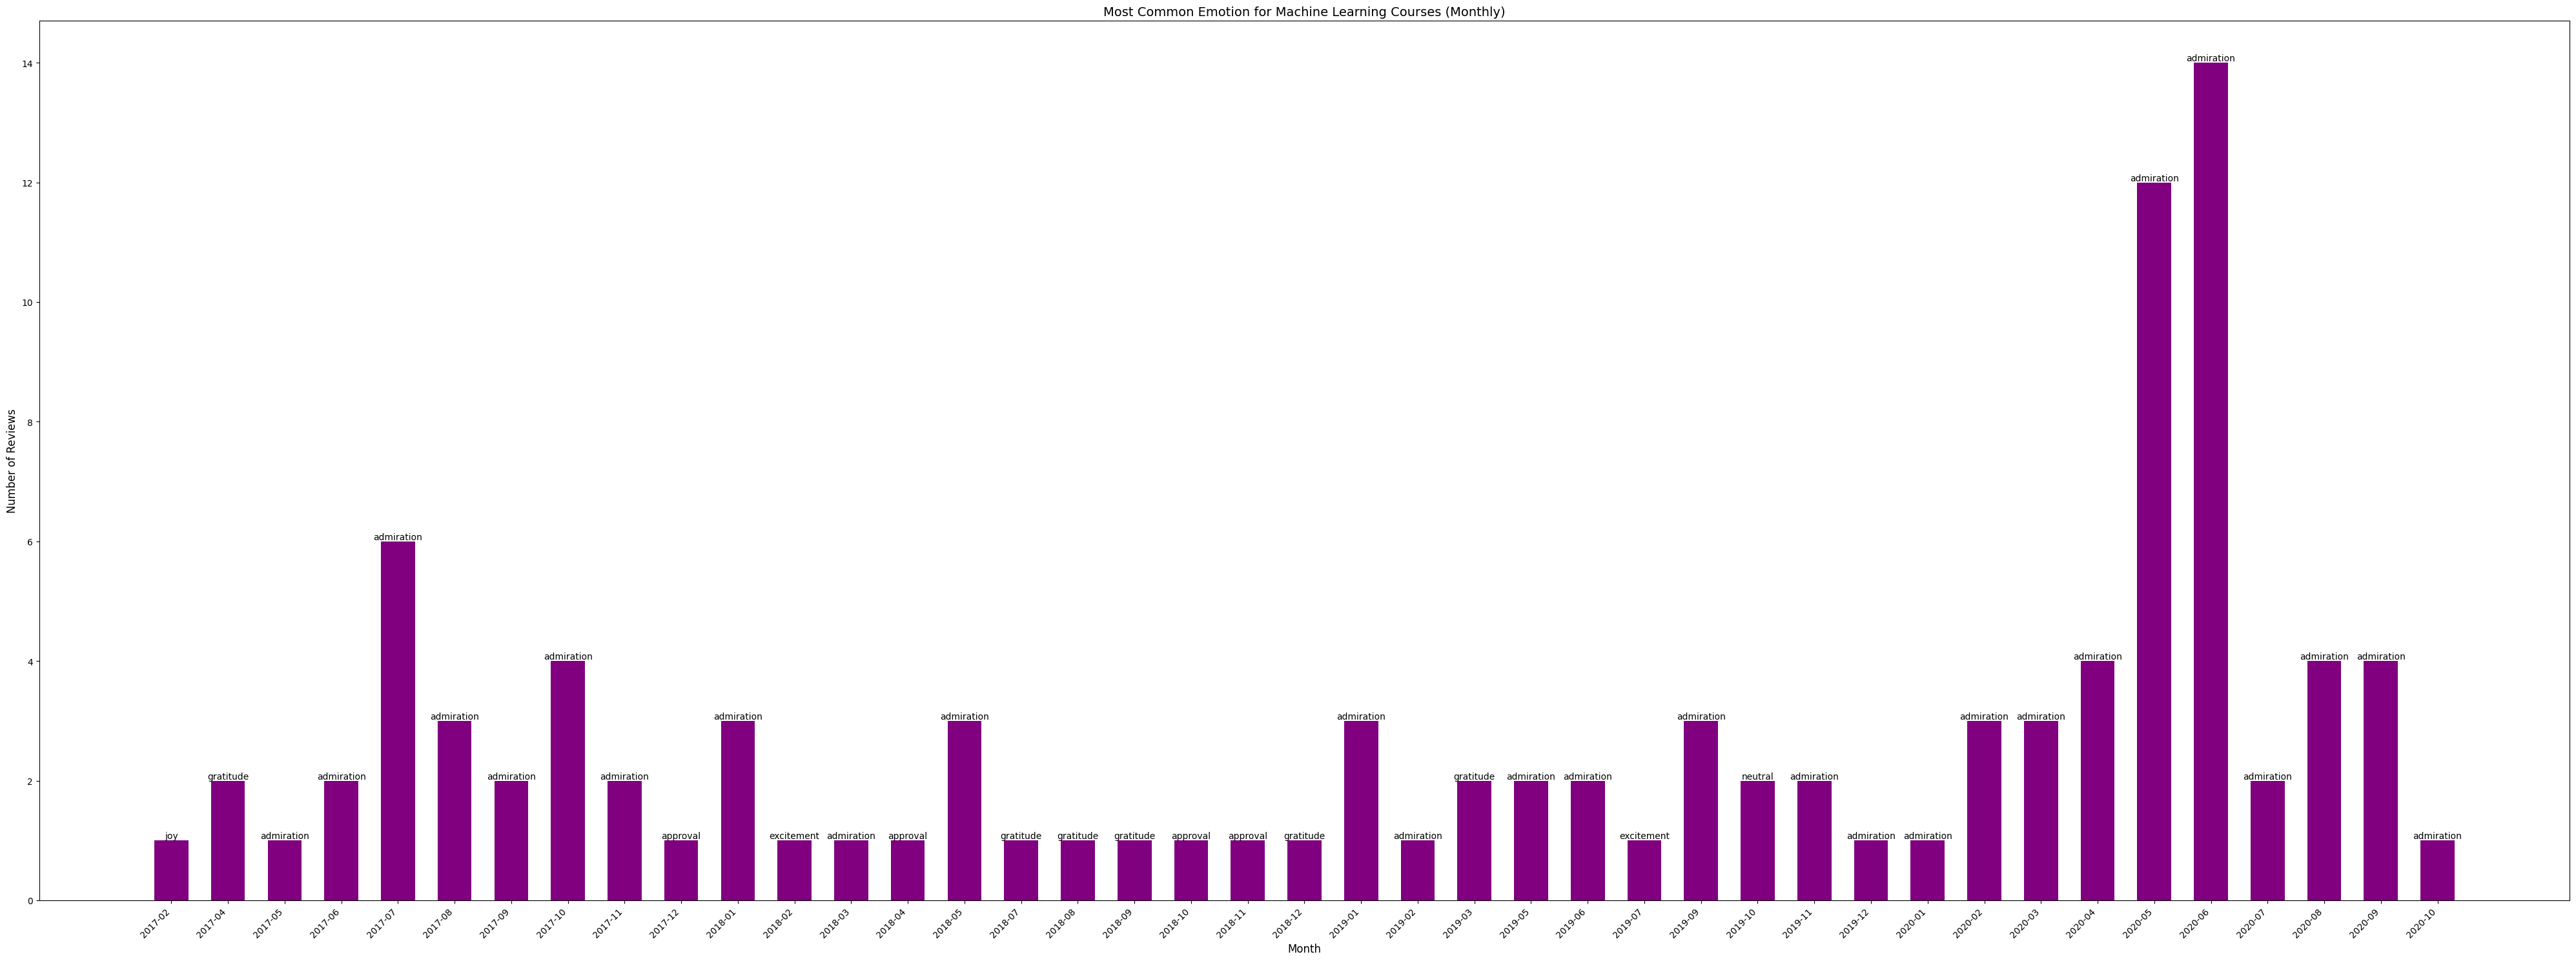

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

# Strip any leading/trailing spaces from column names
df.columns = df.columns.str.strip()

# Filter the DataFrame for reviews from the 'Python' courses (case insensitive)
python_reviews = df[df['course_id'] == 'information-security-data']

# Group by month and emotion, then count the occurrences of each emotion
monthly_emotion_counts = python_reviews.groupby(['month', 'emotion_label']).size().unstack(fill_value=0)

# Find the most common emotion for each month (the one with the highest count in each month)
most_common_emotion_per_month = monthly_emotion_counts.idxmax(axis=1)

# Find the count of the most common emotion for each month
most_common_emotion_count_per_month = monthly_emotion_counts.max(axis=1)

# Plotting the most common emotion for each month
plt.figure(figsize=(40, 15))

# Create a bar plot for the most common emotion per month
bars = plt.bar(most_common_emotion_per_month.index, most_common_emotion_count_per_month, color='purple', width=0.6)  # Adjust width for spacing

# Add titles and labels
plt.title('Most Common Emotion for Machine Learning Courses (Monthly)', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Reviews', fontsize=12)

# Rotate x-axis labels to prevent overlap
plt.xticks(rotation=45, ha='right', fontsize=10)

# Add labels to each bar indicating the emotion
for bar, emotion in zip(bars, most_common_emotion_per_month):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), emotion,
             ha='center', va='bottom', fontsize=10)

plt.tight_layout()  # Ensures everything fits without clipping
plt.show()


Time-series analysis for the most common sentiment in each month - python course

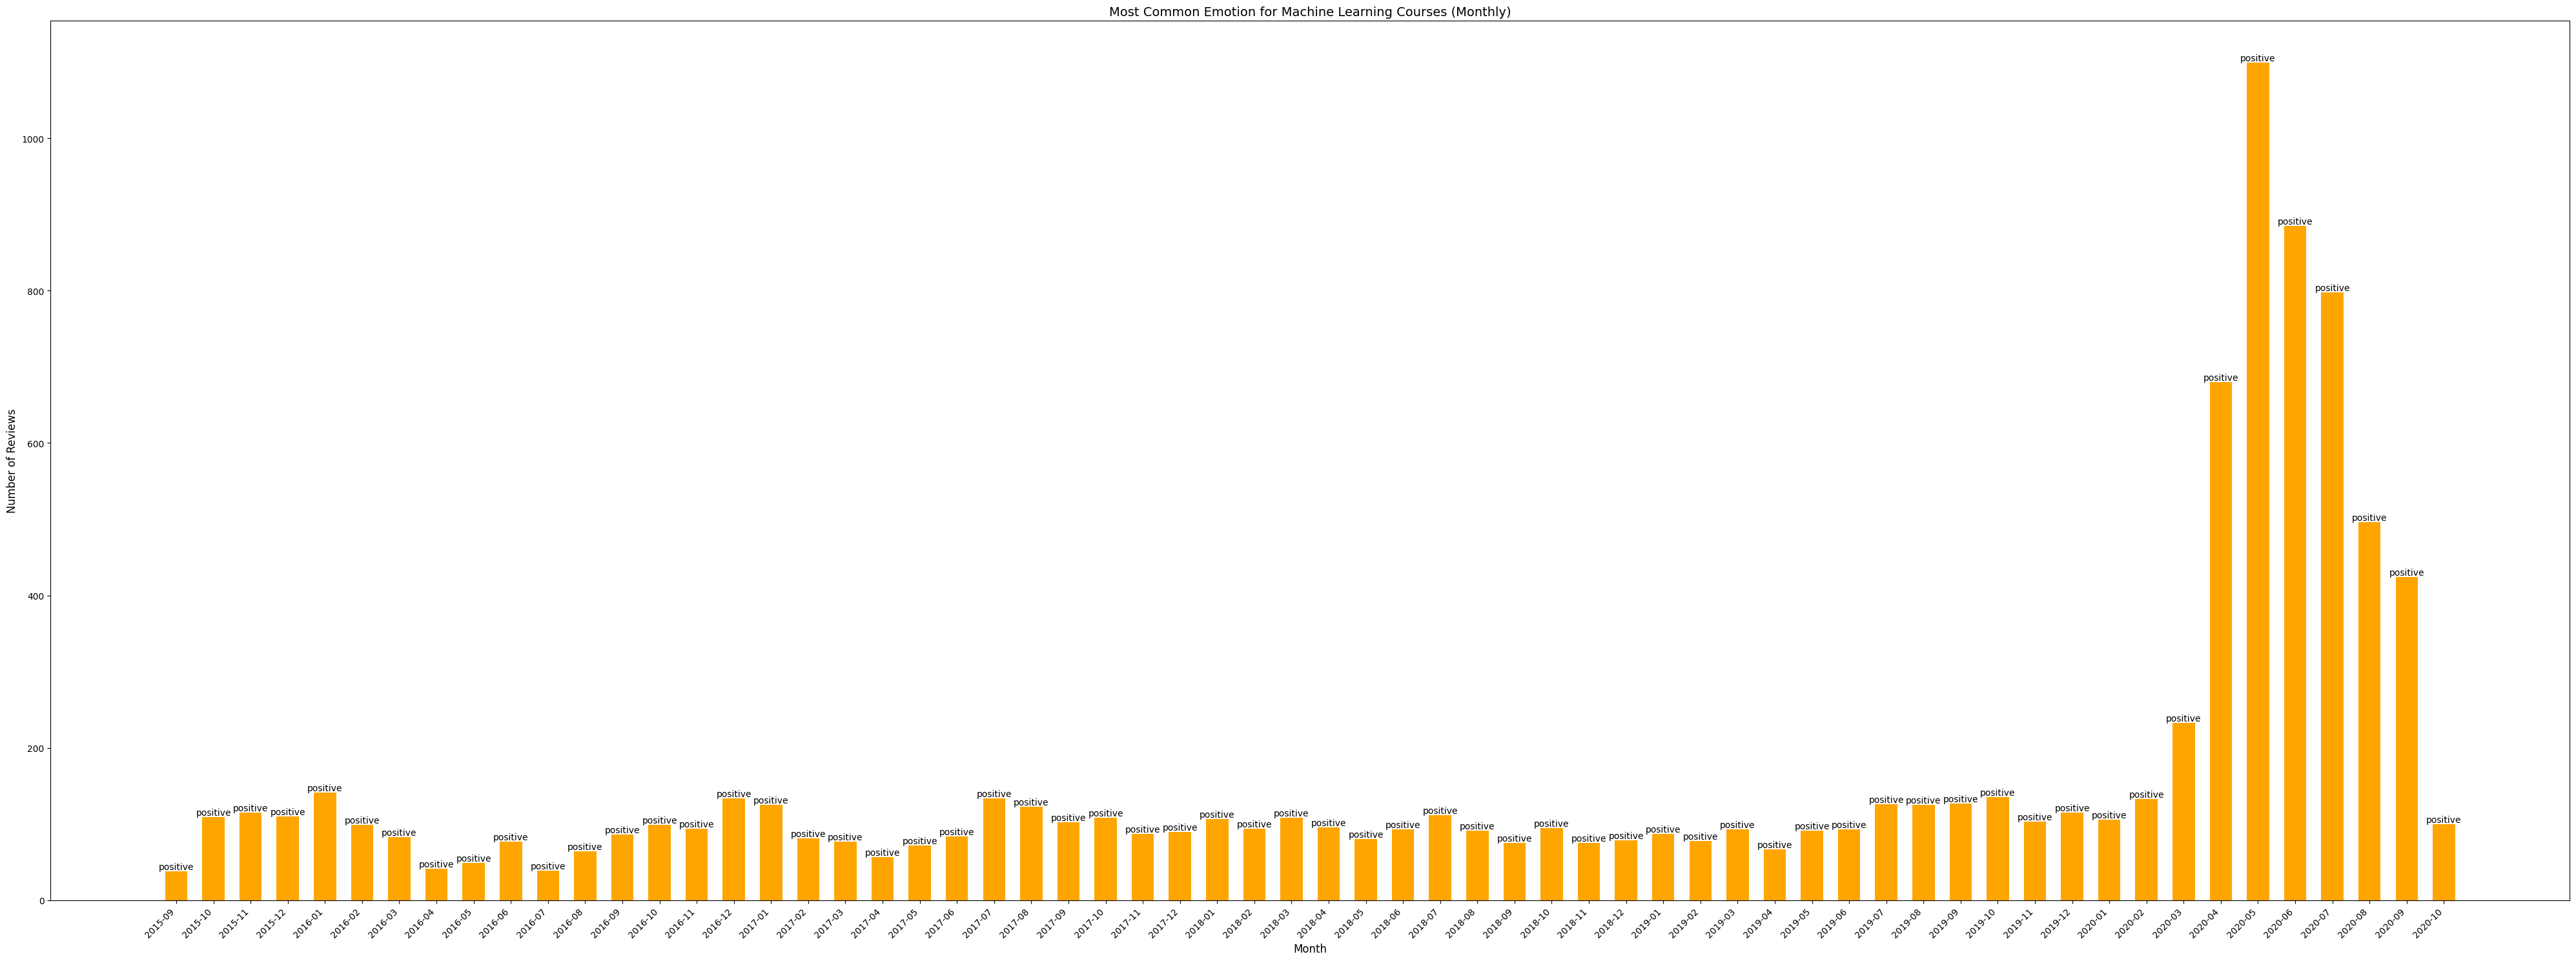

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

# Strip any leading/trailing spaces from column names
df.columns = df.columns.str.strip()

# Filter the DataFrame for reviews from the 'Python' courses (case insensitive)
python_reviews = df[df['course_id'] == 'python']

# Group by month and emotion, then count the occurrences of each emotion
monthly_emotion_counts = python_reviews.groupby(['month', 'sentiment_label_from_review']).size().unstack(fill_value=0)

# Find the most common emotion for each month (the one with the highest count in each month)
most_common_emotion_per_month = monthly_emotion_counts.idxmax(axis=1)

# Find the count of the most common emotion for each month
most_common_emotion_count_per_month = monthly_emotion_counts.max(axis=1)

# Plotting the most common emotion for each month
plt.figure(figsize=(40, 15))

# Create a bar plot for the most common emotion per month
bars = plt.bar(most_common_emotion_per_month.index, most_common_emotion_count_per_month, color='orange', width=0.6)  # Adjust width for spacing

# Add titles and labels
plt.title('Most Common Emotion for Python Course (Monthly)', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Reviews', fontsize=12)

# Rotate x-axis labels to prevent overlap
plt.xticks(rotation=45, ha='right', fontsize=10)

# Add labels to each bar indicating the emotion
for bar, emotion in zip(bars, most_common_emotion_per_month):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), emotion,
             ha='center', va='bottom', fontsize=10)

plt.tight_layout()  # Ensures everything fits without clipping
plt.show()


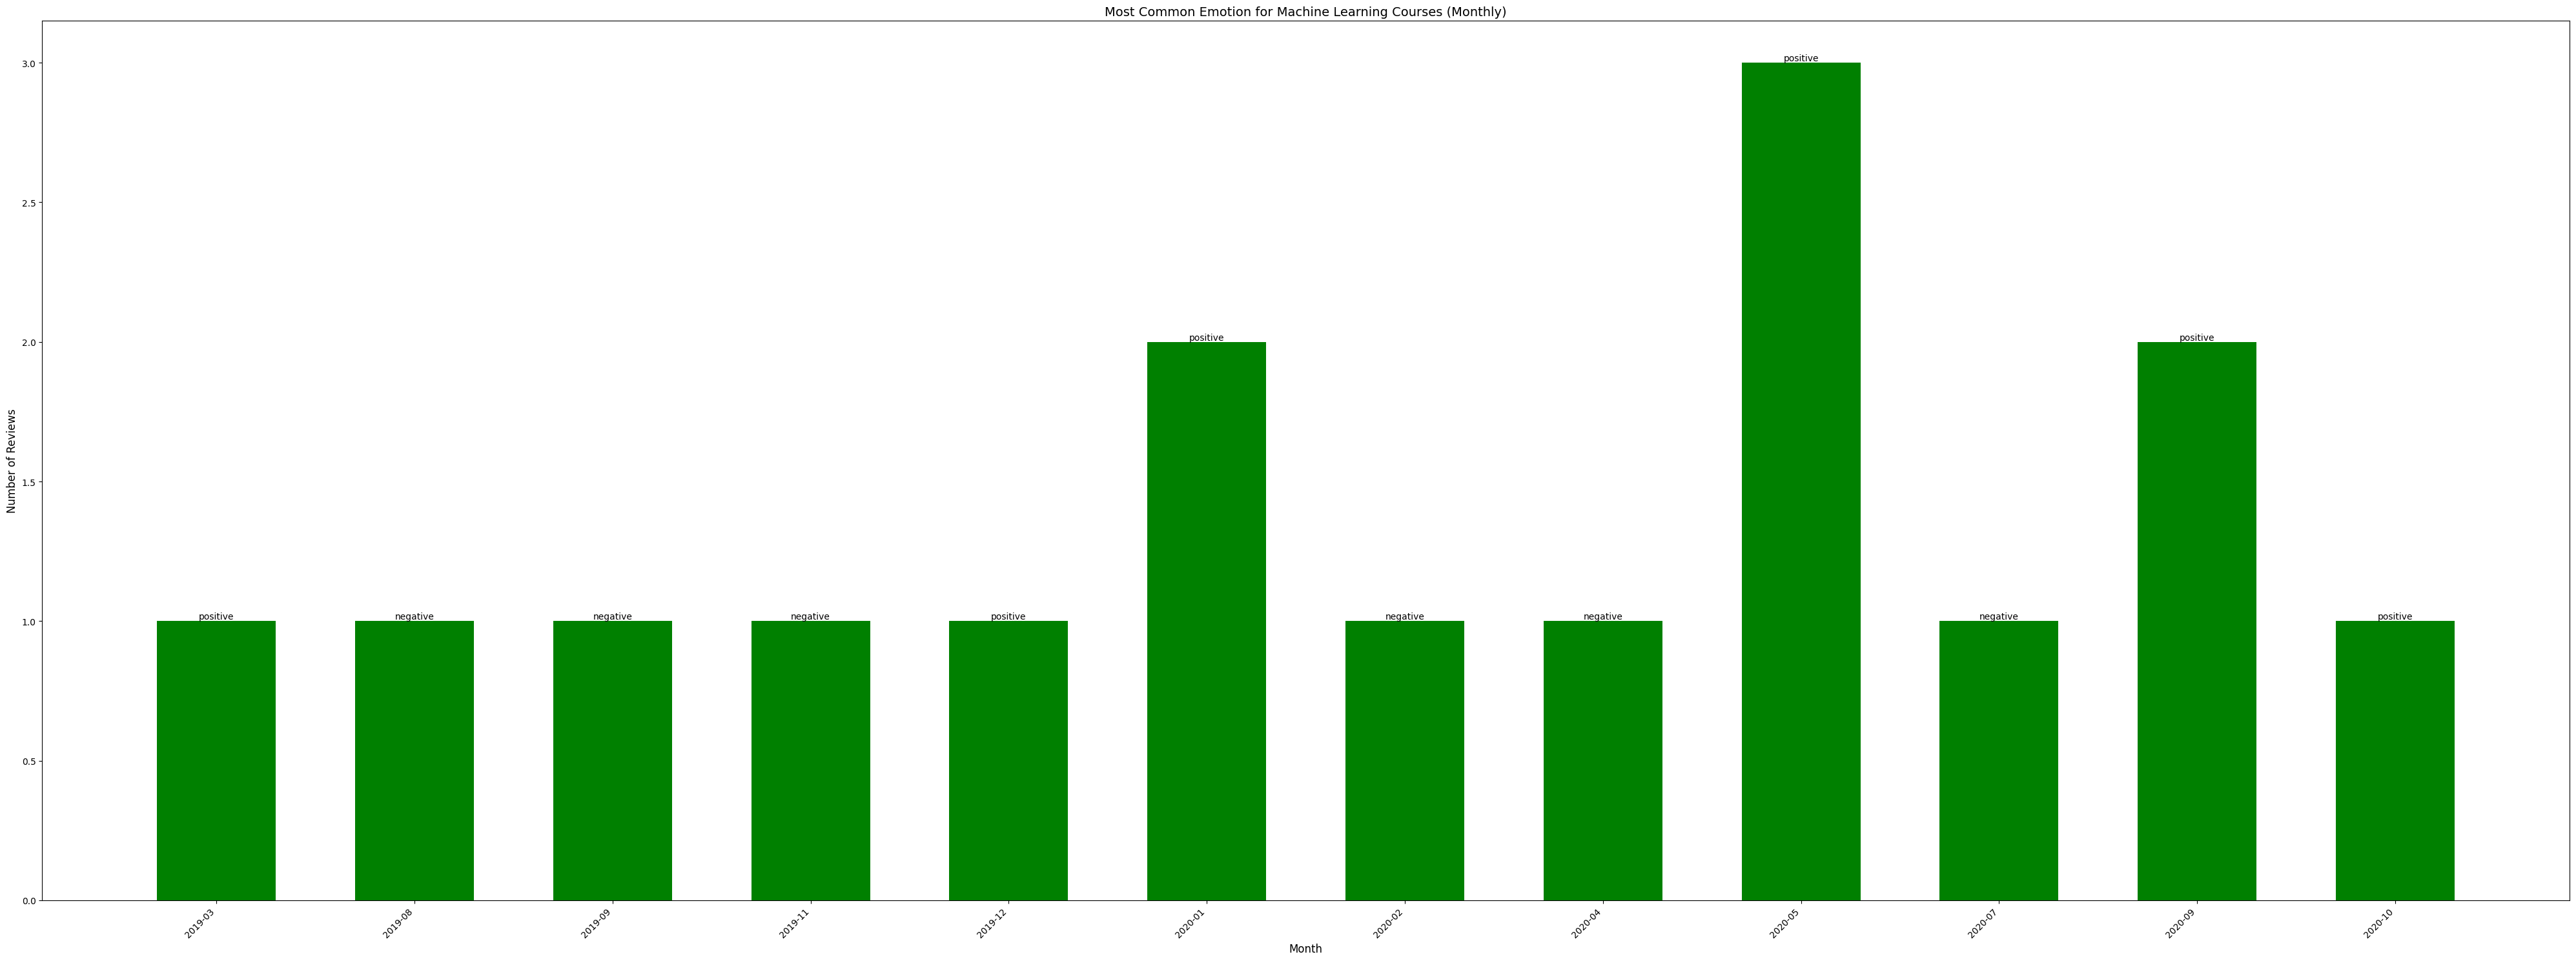

In [52]:
import pandas as pd
import matplotlib.pyplot as plt

# Strip any leading/trailing spaces from column names
df.columns = df.columns.str.strip()

# Filter the DataFrame for reviews from the 'Python' courses (case insensitive)
python_reviews = df[df['course_id'] == 'quantum-computing-algorithms']

# Group by month and emotion, then count the occurrences of each emotion
monthly_emotion_counts = python_reviews.groupby(['month', 'sentiment_label_from_review']).size().unstack(fill_value=0)

# Find the most common emotion for each month (the one with the highest count in each month)
most_common_emotion_per_month = monthly_emotion_counts.idxmax(axis=1)

# Find the count of the most common emotion for each month
most_common_emotion_count_per_month = monthly_emotion_counts.max(axis=1)

# Plotting the most common emotion for each month
plt.figure(figsize=(40, 15))

# Create a bar plot for the most common emotion per month
bars = plt.bar(most_common_emotion_per_month.index, most_common_emotion_count_per_month, color='green', width=0.6)  # Adjust width for spacing

# Add titles and labels
plt.title('Most Common Emotion for Machine Learning Courses (Monthly)', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Reviews', fontsize=12)

# Rotate x-axis labels to prevent overlap
plt.xticks(rotation=45, ha='right', fontsize=10)

# Add labels to each bar indicating the emotion
for bar, emotion in zip(bars, most_common_emotion_per_month):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), emotion,
             ha='center', va='bottom', fontsize=10)

plt.tight_layout()  # Ensures everything fits without clipping
plt.show()


Time-series analysis for the most common rating - for the python course - would be basically same as sentiment --> need to create hybrid mapping

In [11]:
! pip install seaborn
! pip install plotly
